In [8]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [9]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds



In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
from IPython import display

In [11]:
import pathlib
import shutil
import tempfile

In [12]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [13]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [14]:
print("Version: ", tf.__version__)

Version:  2.13.0


In [15]:
print("Hub version: ", hub.__version__)

Hub version:  0.14.0


In [16]:
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is NOT AVAILABLE


In [17]:
logdir=pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [18]:
df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
                 compression='zip', low_memory=False)

In [19]:
df.shape

(1306122, 3)

<Axes: title={'center': 'Target Distribution'}, ylabel='Frequency'>

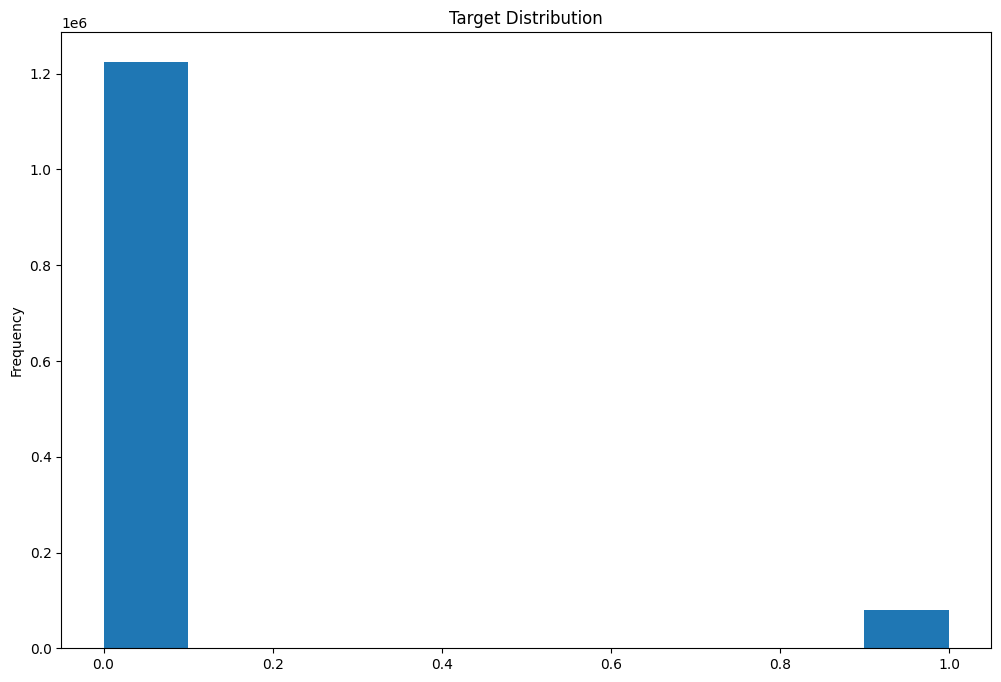

In [20]:
df['target'].plot(kind='hist', title='Target Distribution')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_df, remaining=train_test_split(df, random_state=42, train_size= 0.01, stratify=df.target.values)
valid_df, _=train_test_split(remaining, random_state=42, train_size=0.001, stratify=remaining.target.values)
train_df.shape, valid_df.shape

((13061, 3), (1293, 3))

In [23]:
train_df.target.head(15).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [24]:
train_df.question_text.head(15).values

array(['What is your experience living in Venezuela in the current crisis? (2018)',
       'In which state/city the price of property is highest?',
       'Do rich blacks also call poor whites, “White Trash”?',
       'Should my 5 yr old son and 2 yr old daughter spend the summer with their father, after a domestic violent relationship?',
       'Why do we have parents?',
       'Do we experience ghost like Murphy did in Interstellar?',
       'Are Estoniano women beautiful?',
       'There was a Funny or Die video called Sensitivity Hoedown that got pulled. Does anyone know why?',
       'Is it a good idea to go in fully mainstream classes, even if I have meltdowns that might disrupt people?',
       'What classifies a third world country as such?',
       'Is being a pilot safe?',
       'Who is Illiteratendra Modi? Why does he keep with him a Rs 1 lakh pen?',
       'Have modern management strategies such as Total supply Chain Management applied to education? Can they be?',
       '

Task 5 and 6


In [25]:
module_url="https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [26]:
def train_and_evaluate_model(module_url, embed_size, name, trainable=False):
  hub_layer=hub.KerasLayer(module_url, input_shape=[], output_shape=[embed_size], dtype=tf.string, trainable=trainable)
  model=tf.keras.models.Sequential([
                                  hub_layer,
                                  tf.keras.layers.Dense(256, activation='relu'),
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  #model compilation
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.BinaryAccuracy(name='accuracy')])
  model.summary()
  # fitting the model
  history=model.fit(train_df['question_text'],train_df['target'],
                    epochs=100,
                    batch_size=32,
                    validation_data=(valid_df['question_text'], valid_df['target']),
                    callbacks=[tfdocs.modeling.EpochDots(),
                               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min'),
                               tf.keras.callbacks.TensorBoard(logdir/name)],
                    verbose=0)
  return history

7

In [ ]:
 histories={}

In [ ]:
module_url="https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [ ]:
histories['gnews-swivel-20dim']=train_and_evaluate_model(module_url, embed_size=20,name='gnews-swivel-20dim')


Epoch: 0, accuracy:0.9235,  loss:0.2722,  val_accuracy:0.9381,  val_loss:0.2021,  
..............

In [ ]:
 histories={}

In [ ]:
module_url="https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1"

In [ ]:
histories['nnlm-en-dim50']=train_and_evaluate_model(module_url, embed_size=50,name='nnlm-en-dim50')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_12 (Dense)            (None, 256)               13056     
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 48220169 (183.95 MB)
Trainable params: 29569 (115.50 KB)
Non-trainable params: 48190600 (183.83 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9373,  loss:0.3219,  val_accuracy:0.9381,  val_loss:0.2259,  
......................

In [ ]:
 histories={}

In [ ]:
module_url="https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"

In [ ]:
histories['nnlm-en-dim128']=train_and_evaluate_model(module_url, embed_size=50,name='nnlm-en-dim128')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 124692225 (475.66 MB)
Trainable params: 49537 (193.50 KB)
Non-trainable params: 124642688 (475.47 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9340,  loss:0.3155,  val_accuracy:0.9381,  val_loss:0.2112,  
............

In [ ]:
 histories={}

In [ ]:
module_url="https://tfhub.dev/google/universal-sentence-encoder/4"

In [ ]:
histories['universal-sentence-encoder']=train_and_evaluate_model(module_url, embed_size=50,name='universal-sentence-encoder')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 64)                16448     
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256945665 (980.17 MB)
Trainable params: 147841 (577.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9381,  loss:0.2868,  val_accuracy:0.9381,  val_loss:0.1723,  
..........

In [ ]:
https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1

In [ ]:
https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1

In [ ]:
https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1

In [ ]:
https://tfhub.dev/google/universal-sentence-encoder/4

In [ ]:
https://tfhub.dev/google/universal-sentence-encoder-large/5

In [27]:
 histories={}

In [28]:
module_url="https://tfhub.dev/google/universal-sentence-encoder/4"

In [56]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" #@param ["https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1", "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1", "https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"] {allow-input: true}

In [57]:
histories['sentence-encoder-large/5']=train_and_evaluate_model(module_url, embed_size=512,name='sentence-encoder-large/5', trainable=False)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 512)               147354880 
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 64)                16448     
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 147502721 (562.68 MB)
Trainable params: 147841 (577.50 KB)
Non-trainable params: 147354880 (562.11 MB)
_________________________________________________________________

Epoch: 0, accuracy:0.9123,  loss:0.3471,  val_accuracy:0.9381,  val_loss:0.1779,  
............

Task 8

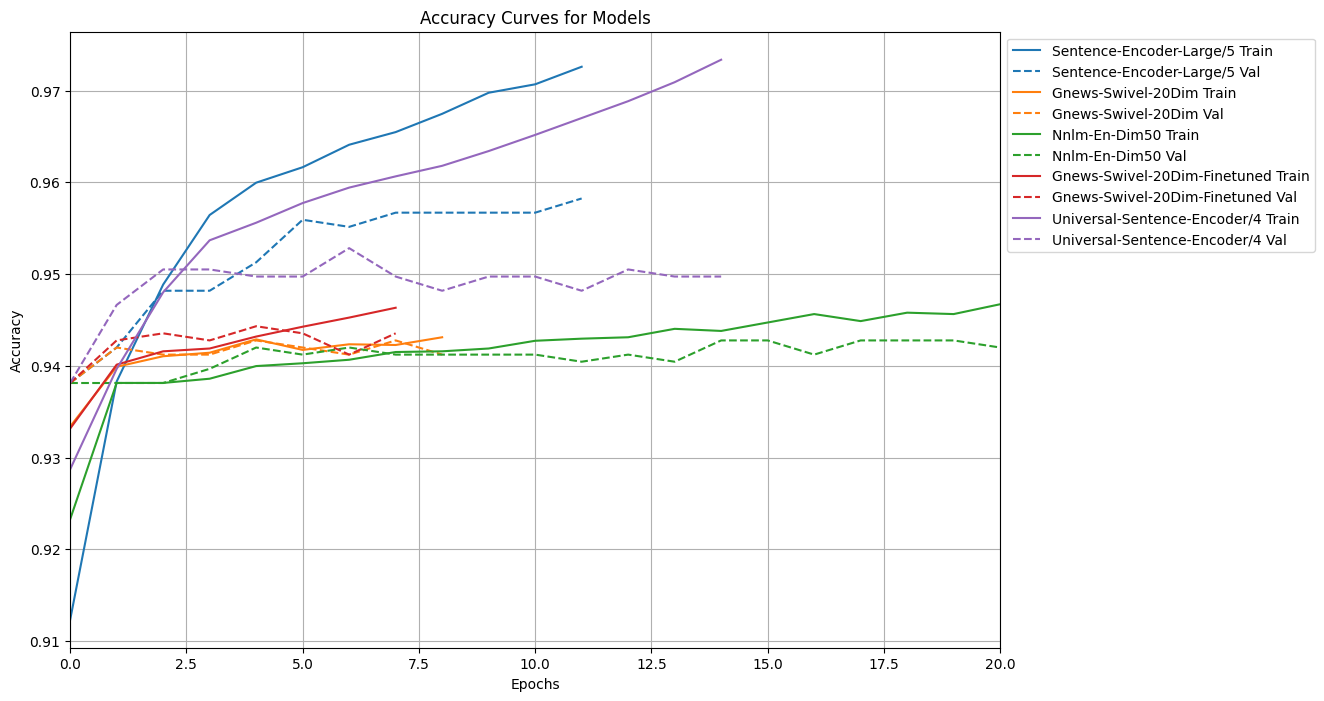

In [58]:
plt.rcParams['figure.figsize']=(12,8)
plotter=tfdocs.plots.HistoryPlotter(metric='accuracy')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0,1.0), loc='upper left')
plt.title("Accuracy Curves for Models")
plt.show()

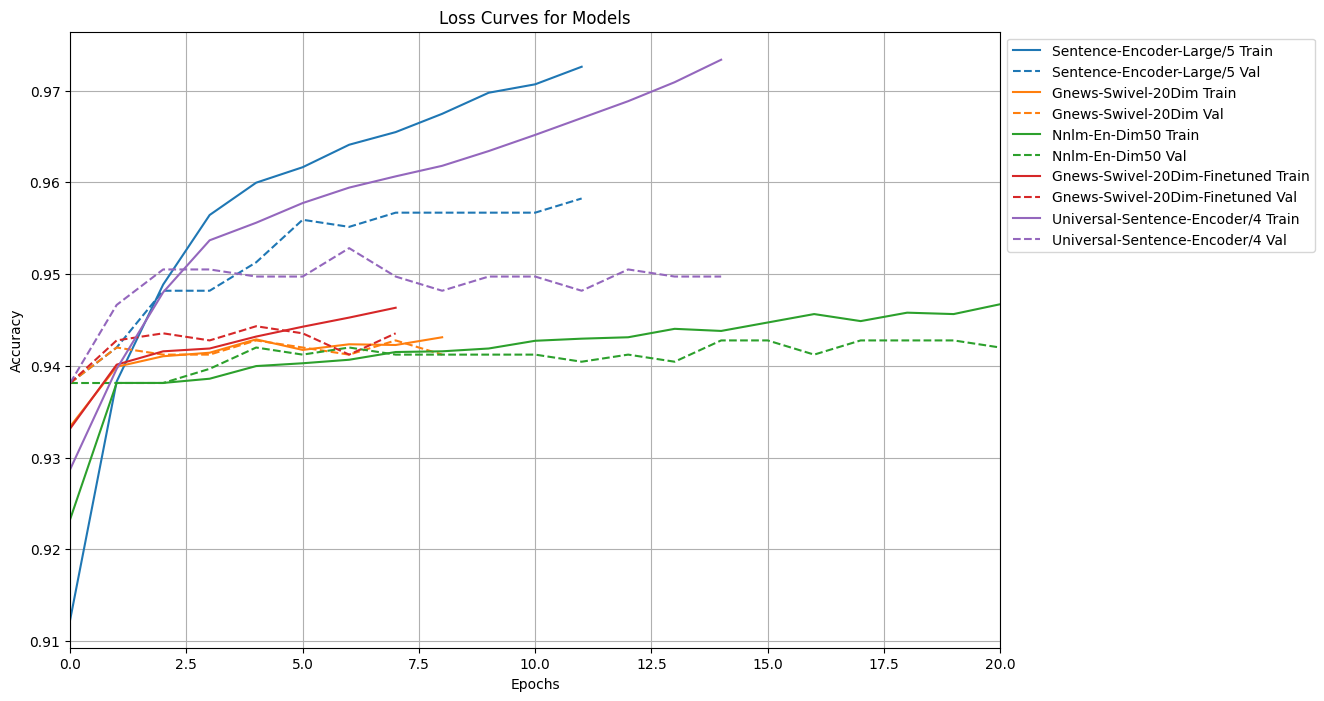

In [59]:
Plotter=tfdocs.plots.HistoryPlotter(metric='loss')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0,1.0), loc='upper left')
plt.title("Loss Curves for Models")
plt.show()

10

In [60]:
%load_ext tensorboard
%tensorboard --logdir {logdir}

<IPython.core.display.Javascript object>